In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
from mpl_toolkits.mplot3d import Axes3D
import statsmodels.api as sm
import missingno as msno
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.neighbors import LocalOutlierFactor
from scipy.stats import levene
from scipy.stats import shapiro
from scipy.stats.stats import pearsonr
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.preprocessing import scale
from sklearn.model_selection import ShuffleSplit, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
import xgboost as xgb
from xgboost import XGBRegressor, XGBClassifier
from lightgbm import LGBMRegressor, LGBMClassifier
from catboost import CatBoostRegressor, CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import tree
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve

C:\Users\DELL\AppData\Local\Temp\ipykernel_7780\908373213.py:14: DeprecationWarning: Please import `pearsonr` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.stats.stats import pearsonr


In [66]:
# Load the original dataset to get information about columns and data types
original_df = pd.read_csv("D:/Dummy/dielectron.csv")  # Replace with your actual path

# Get the number of rows and columns from the original dataset
n_rows = original_df.shape[0]
n_cols = original_df.shape[1]

# Get the column names
cols = original_df.columns

# Create an empty DataFrame to hold the synthetic data
synthetic_df = pd.DataFrame(columns=cols)

# Iterate through the columns and generate synthetic data based on the original data type
for col in cols:
    if pd.api.types.is_integer_dtype(original_df[col]):  # Check for integer type
        synthetic_df[col] = np.random.randint(original_df[col].min(), original_df[col].max(), size=n_rows)
    elif pd.api.types.is_float_dtype(original_df[col]):  # Check for float type
        synthetic_df[col] = np.random.uniform(original_df[col].min(), original_df[col].max(), size=n_rows)
    else:  # For other data types (e.g., object/string) - handle as needed
        # For simplicity, let's assume they are all numeric and generate floats
        # You might want to handle them differently based on your data
        synthetic_df[col] = np.random.uniform(0, 1, size=n_rows)  # Placeholder

# Ensure 'Event' column remains as integers (if it's an ID)
if 'Event' in synthetic_df.columns:
    synthetic_df['Event'] = synthetic_df['Event'].astype(int)

# Print the first few rows of the synthetic data
print(synthetic_df.head())

# Save the synthetic data to a new CSV file
synthetic_df.to_csv("synthetic_dielectron.csv", index=False)
print("Synthetic dataset saved to synthetic_dielectron.csv")

      Run       Event          E1         px1         py1         pz1  \
0  147479  1663259210  439.630675 -127.753359  118.200682 -370.835670   
1  149125  1373409661  167.599864 -179.145380   65.843851 -587.659452   
2  148435  1002994585   33.439827   92.033641   36.939797  325.657676   
3  148693   950626652  612.421765   26.569820   91.472220 -287.301845   
4  147142  1761003415  124.907204  105.477135   40.158636 -696.769851   

          pt1      eta1      phi1  Q1          E2         px2         py2  \
0  200.377470 -2.820601  1.601380   0  334.342887  -40.018053    0.507813   
1  255.049280 -0.012116 -2.773665  -1  306.622297   18.289319 -144.821269   
2   57.369596  2.140415 -0.403507  -1   28.848393 -119.401861  -97.122957   
3   47.219251 -0.253839  0.090838  -1   44.501938 -181.896976  -97.107222   
4   74.680608 -2.139136  1.552902   0  410.703482  182.721429  162.383547   

          pz2         pt2      eta2      phi2  Q2          M  
0 -141.020481  249.433750  0.779903

In [67]:
synthetic_df

Run       Event          E1         px1         py1         pz1  \
0      147479  1663259210  439.630675 -127.753359  118.200682 -370.835670   
1      149125  1373409661  167.599864 -179.145380   65.843851 -587.659452   
2      148435  1002994585   33.439827   92.033641   36.939797  325.657676   
3      148693   950626652  612.421765   26.569820   91.472220 -287.301845   
4      147142  1761003415  124.907204  105.477135   40.158636 -696.769851   
...       ...         ...         ...         ...         ...         ...   
99995  146818  1340672829  806.691578 -149.001536  -70.356053 -228.214524   
99996  147502   558364660  608.476529  -38.948018  102.071051 -594.455793   
99997  148608   580591938   28.705861    2.122575  -59.822134 -514.929815   
99998  148097   440286196   68.870662 -243.283227  -13.241384  194.455919   
99999  148743  1365137989  824.891786 -122.522172 -103.699453  707.590018   

              pt1      eta1      phi1  Q1          E2         px2         py2  \
0      200.377470 -2.820601  1.601380   0  334.342887  -40.018053    0.507813   
1      255.049280 -0.012116 -2.773665  -1  306.622297   18.289319 -144.821269   
2       57.369596  2.140415 -0.403507  -1   28.848393 -119.401861  -97.122957   
3       47.219251 -0.253839  0.090838  -1   44.501938 -181.896976  -97.107222   
4       74.680608 -2.139136  1.552902   0  410.703482  182.721429  162.383547   
...           ...       ...       ...  ..         ...         ...         ...   
99995   97.436668 -2.141130 -2.148548   0  723.602989  137.361486  119.996637   
99996  226.289917  1.733939  3.086075   0  890.193243  -58.238923  -72.457378   
99997   12.128634 -1.339897  2.201140   0  830.401922 -225.877945  -81.786747   
99998    5.145988  0.020893 -1.732239   0  630.332616 -121.840873  121.311560   
99999  193.528467  0.004735  1.299479  -1  258.196953 -189.180588   68.037918   

              pz2         pt2      eta2      phi2  Q2           M  
0     -141.020481  249.433750  0.779903 -3.032571   0   18.206867  
1      682.888382   51.389535  1.803197 -1.503723   0   52.154304  
2      864.711772  126.683994  1.330572 -0.704446   0   50.345115  
3       72.798156   83.974423 -4.833243  1.164448  -1   73.611716  
4      679.260121  209.980652 -1.162660 -2.441864  -1   62.580047  
...           ...         ...       ...       ...  ..         ...  
99995   54.383811  148.395670 -4.221233  1.951025  -1   34.219897  
99996  894.234235  110.742160 -0.680621 -0.414154  -1    3.253543  
99997  406.375099  248.660936 -3.170485  2.163030   0   80.300689  
99998  875.966654   79.194554  2.900155  0.003711   0  100.379726  
99999 -174.422469  212.724816 -0.028035 -1.758315  -1   86.943967  

[100000 rows x 19 columns]

In [68]:
synthetic_df.head()

Run       Event          E1         px1         py1         pz1  \
0  147479  1663259210  439.630675 -127.753359  118.200682 -370.835670   
1  149125  1373409661  167.599864 -179.145380   65.843851 -587.659452   
2  148435  1002994585   33.439827   92.033641   36.939797  325.657676   
3  148693   950626652  612.421765   26.569820   91.472220 -287.301845   
4  147142  1761003415  124.907204  105.477135   40.158636 -696.769851   

          pt1      eta1      phi1  Q1          E2         px2         py2  \
0  200.377470 -2.820601  1.601380   0  334.342887  -40.018053    0.507813   
1  255.049280 -0.012116 -2.773665  -1  306.622297   18.289319 -144.821269   
2   57.369596  2.140415 -0.403507  -1   28.848393 -119.401861  -97.122957   
3   47.219251 -0.253839  0.090838  -1   44.501938 -181.896976  -97.107222   
4   74.680608 -2.139136  1.552902   0  410.703482  182.721429  162.383547   

          pz2         pt2      eta2      phi2  Q2          M  
0 -141.020481  249.433750  0.779903 -3.032571   0  18.206867  
1  682.888382   51.389535  1.803197 -1.503723   0  52.154304  
2  864.711772  126.683994  1.330572 -0.704446   0  50.345115  
3   72.798156   83.974423 -4.833243  1.164448  -1  73.611716  
4  679.260121  209.980652 -1.162660 -2.441864  -1  62.580047

In [69]:
df_syn = synthetic_df

In [70]:
df_syn.head()

Run       Event          E1         px1         py1         pz1  \
0  147479  1663259210  439.630675 -127.753359  118.200682 -370.835670   
1  149125  1373409661  167.599864 -179.145380   65.843851 -587.659452   
2  148435  1002994585   33.439827   92.033641   36.939797  325.657676   
3  148693   950626652  612.421765   26.569820   91.472220 -287.301845   
4  147142  1761003415  124.907204  105.477135   40.158636 -696.769851   

          pt1      eta1      phi1  Q1          E2         px2         py2  \
0  200.377470 -2.820601  1.601380   0  334.342887  -40.018053    0.507813   
1  255.049280 -0.012116 -2.773665  -1  306.622297   18.289319 -144.821269   
2   57.369596  2.140415 -0.403507  -1   28.848393 -119.401861  -97.122957   
3   47.219251 -0.253839  0.090838  -1   44.501938 -181.896976  -97.107222   
4   74.680608 -2.139136  1.552902   0  410.703482  182.721429  162.383547   

          pz2         pt2      eta2      phi2  Q2          M  
0 -141.020481  249.433750  0.779903 -3.032571   0  18.206867  
1  682.888382   51.389535  1.803197 -1.503723   0  52.154304  
2  864.711772  126.683994  1.330572 -0.704446   0  50.345115  
3   72.798156   83.974423 -4.833243  1.164448  -1  73.611716  
4  679.260121  209.980652 -1.162660 -2.441864  -1  62.580047

In [71]:
df_syn.info

<bound method DataFrame.info of           Run       Event          E1         px1         py1         pz1  \
0      147479  1663259210  439.630675 -127.753359  118.200682 -370.835670   
1      149125  1373409661  167.599864 -179.145380   65.843851 -587.659452   
2      148435  1002994585   33.439827   92.033641   36.939797  325.657676   
3      148693   950626652  612.421765   26.569820   91.472220 -287.301845   
4      147142  1761003415  124.907204  105.477135   40.158636 -696.769851   
...       ...         ...         ...         ...         ...         ...   
99995  146818  1340672829  806.691578 -149.001536  -70.356053 -228.214524   
99996  147502   558364660  608.476529  -38.948018  102.071051 -594.455793   
99997  148608   580591938   28.705861    2.122575  -59.822134 -514.929815   
99998  148097   440286196   68.870662 -243.283227  -13.241384  194.455919   
99999  148743  1365137989  824.891786 -122.522172 -103.699453  707.590018   

              pt1      eta1      phi1  Q1  

In [72]:
df_syn.describe()

Run         Event             E1            px1  \
count  100000.00000  1.000000e+05  100000.000000  100000.000000   
mean   147850.09807  8.976425e+08     424.975023     -57.804767   
std       771.88186  5.173372e+08     245.545731     111.136842   
min    146511.00000  8.418000e+03       0.382155    -250.581789   
25%    147180.00000  4.504248e+08     212.041606    -153.917178   
50%    147851.00000  8.989096e+08     425.336717     -58.090262   
75%    148521.00000  1.346848e+09     637.758886      38.383475   
max    149181.00000  1.791218e+09     850.597824     134.536941   

                 py1            pz1            pt1           eta1  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean       10.400167     -41.922480     132.816364      -0.764635   
std        79.113574     461.326016      76.643701       1.960238   
min      -126.075244    -840.983628       0.222249      -4.165324   
25%       -58.369231    -440.459215      66.349365      -2.459780   
50%        10.531402     -41.286191     132.665427      -0.762690   
75%        78.897225     355.666065     199.287573       0.931844   
max       147.462081     760.087415     265.576612       2.622897   

                phi1             Q1             E2            px2  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean       -0.006341      -0.500100     473.979405      -3.351418   
std         1.816874       0.500002     273.210536     133.005230   
min        -3.141435      -1.000000       0.483496    -233.725823   
25%        -1.586638      -1.000000     237.346050    -118.064981   
50%        -0.005308      -1.000000     473.993509      -3.864252   
75%         1.570832       0.000000     709.840940     111.909375   
max         3.141398       0.000000     948.374918     227.329385   

                 py2            pz2            pt2           eta2  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean       10.469567     139.959261     141.155630      -1.994090   
std        89.836467     459.208874      81.268481       2.919015   
min      -145.645746    -655.361660       0.033491      -7.064700   
25%       -67.244013    -257.414686      70.381438      -4.515462   
50%        10.857728     139.242940     140.854271      -2.002298   
75%        87.997825     538.278017     212.056541       0.529533   
max       166.273728     935.552078     281.648472       3.060441   

                phi2             Q2              M  
count  100000.000000  100000.000000  100000.000000  
mean       -0.003673      -0.499150      56.070443  
std         1.811318       0.500002      31.163998  
min        -3.141464      -1.000000       2.000598  
25%        -1.575443      -1.000000      29.040246  
50%        -0.017126       0.000000      56.299078  
75%         1.569080       0.000000      83.014788  
max         3.141260       0.000000     109.998485

In [73]:
df_syn.isna().sum()

Run      0
Event    0
E1       0
px1      0
py1      0
pz1      0
pt1      0
eta1     0
phi1     0
Q1       0
E2       0
px2      0
py2      0
pz2      0
pt2      0
eta2     0
phi2     0
Q2       0
M        0
dtype: int64

In [74]:
df_syn.shape

(100000, 19)

In [75]:
df_syn.isna()

Run  Event     E1    px1    py1    pz1    pt1   eta1   phi1     Q1  \
0      False  False  False  False  False  False  False  False  False  False   
1      False  False  False  False  False  False  False  False  False  False   
2      False  False  False  False  False  False  False  False  False  False   
3      False  False  False  False  False  False  False  False  False  False   
4      False  False  False  False  False  False  False  False  False  False   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
99995  False  False  False  False  False  False  False  False  False  False   
99996  False  False  False  False  False  False  False  False  False  False   
99997  False  False  False  False  False  False  False  False  False  False   
99998  False  False  False  False  False  False  False  False  False  False   
99999  False  False  False  False  False  False  False  False  False  False   

          E2    px2    py2    pz2    pt2   eta2   phi2     Q2      M  
0      False  False  False  False  False  False  False  False  False  
1      False  False  False  False  False  False  False  False  False  
2      False  False  False  False  False  False  False  False  False  
3      False  False  False  False  False  False  False  False  False  
4      False  False  False  False  False  False  False  False  False  
...      ...    ...    ...    ...    ...    ...    ...    ...    ...  
99995  False  False  False  False  False  False  False  False  False  
99996  False  False  False  False  False  False  False  False  False  
99997  False  False  False  False  False  False  False  False  False  
99998  False  False  False  False  False  False  False  False  False  
99999  False  False  False  False  False  False  False  False  False  

[100000 rows x 19 columns]

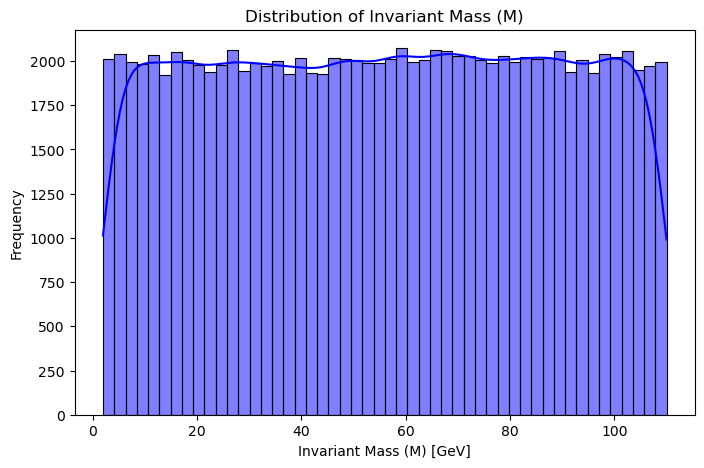

In [77]:
# Data Visualisation
# Plot 1: Histogram of Invariant Mass (M)
plt.figure(figsize=(8, 5))
sns.histplot(df_syn['M'], bins=50, kde=True, color='blue')
plt.xlabel("Invariant Mass (M) [GeV]")
plt.ylabel("Frequency")
plt.title("Distribution of Invariant Mass (M)")
plt.show()

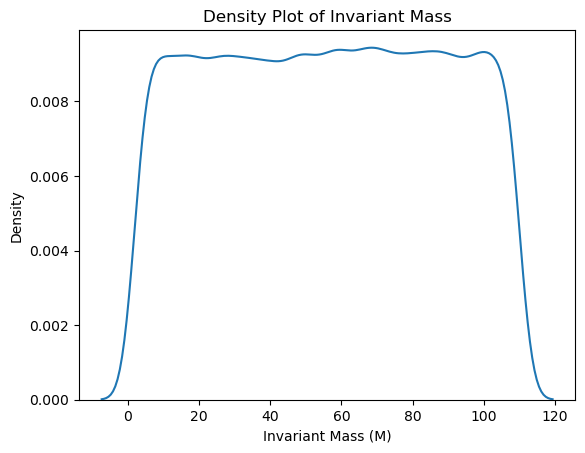

In [83]:
#Create the density plot
sns.kdeplot(df_syn['M'])  # Use seaborn's kdeplot for density estimation
plt.xlabel("Invariant Mass (M)")
plt.ylabel("Density")
plt.title("Density Plot of Invariant Mass")
plt.show()

In [85]:
print(df_syn.groupby(["E1","E2"]).mean()["M"])

E1          E2        
0.382155    411.399997    99.051832
0.390152    318.770077    46.101604
0.392792    696.554037    38.005796
0.412093    358.971345    40.353301
0.412132    875.859222    86.667900
                            ...    
850.563495  109.269125    37.540440
850.566426  242.855393    84.589451
850.573704  219.592258    89.301184
850.588026  882.161263    91.384655
850.597824  396.510025    17.726283
Name: M, Length: 100000, dtype: float64


In [87]:
print(df_syn.groupby(["px1","px2"]).mean()["M"])

px1          px2        
-250.581789  -172.772325     37.779436
-250.581088   206.495681    100.210224
-250.578069  -26.676232      46.099120
-250.572525  -48.447342      19.235751
-250.571535   149.298513     50.850909
                               ...    
 134.532693   210.702278     65.331856
 134.535977   83.738573      16.452306
 134.535991  -46.694363      11.116460
 134.536189  -42.962057      39.313674
 134.536941   24.646802      75.077095
Name: M, Length: 100000, dtype: float64


In [91]:
print(df_syn.groupby(["pz1","pz2"]).mean()["M"])

pz1          pz2        
-840.983628  -267.840789    99.120174
-840.974935   49.832301     66.274784
-840.967446  -306.454757    11.921647
-840.956851   747.608322    70.079226
-840.955479   481.227740    22.423555
                              ...    
 760.035267   499.702933    22.598475
 760.058015   733.164402    41.825893
 760.074727   423.345034    36.140471
 760.081757  -622.264831    78.116727
 760.087415   211.032674    40.154845
Name: M, Length: 100000, dtype: float64


In [99]:
print(df_syn.groupby(["pt1","pt2"]).mean()["M"])

pt1         pt2       
0.222249    123.323537    109.354570
0.227365    139.420546     99.529359
0.230327    256.104871     87.082626
0.231191    54.822120      31.215618
0.241428    220.985747     56.050197
                             ...    
265.560587  133.990595     57.898824
265.564507  170.089810     82.792305
265.564768  197.288150      5.214811
265.567589  64.979979      45.326935
265.576612  98.741487      59.849782
Name: M, Length: 100000, dtype: float64


In [101]:
print(df_syn.groupby(["eta1","eta2"]).mean()["M"])

eta1       eta2     
-4.165324  -1.988872    54.115448
-4.165232  -0.427898    12.212846
-4.165189  -5.239206    71.020397
-4.165121  -5.623986    79.966863
-4.165013   0.220777    43.712033
                          ...    
 2.622760   1.067041    31.446934
 2.622777  -5.386860    87.715887
 2.622799   0.051901    62.333452
 2.622806  -2.957423    19.170377
 2.622897   2.429308     3.630884
Name: M, Length: 100000, dtype: float64


In [103]:
print(df_syn.groupby(["phi1","phi2"]).mean()["M"])

phi1       phi2     
-3.141435   2.828145     4.282509
-3.141354   2.348111    35.056068
-3.141336   2.730203    65.192695
-3.141153  -2.885628    74.900095
-3.141002   0.603734    11.847488
                          ...    
 3.141194   0.834321    34.295985
 3.141207   0.032825    60.653155
 3.141311   1.360307    29.570703
 3.141323   0.461891    88.074278
 3.141398   2.476115    76.586969
Name: M, Length: 100000, dtype: float64


In [121]:
X = df_syn.drop(['Event', 'M'], axis=1)
y = df_syn['M']

In [123]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [125]:
# Scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [127]:
# 5. CatBoost Regressor Model Training
cat_model = CatBoostRegressor(iterations=200,  # Adjust as needed
                              learning_rate=0.05, # Adjust as needed
                              depth=6,           # Adjust as needed
                              l2_leaf_reg=3,     # Adjust as needed
                              loss_function='RMSE', # or 'MAE'
                              eval_metric='RMSE',   # or 'MAE'
                              random_seed=42,
                              verbose=0,        # Set to 1 for detailed output during training
                              early_stopping_rounds=10)

In [129]:
cat_model.fit(X_train_scaled, y_train, eval_set=(X_test_scaled, y_test))

In [131]:
# 6. Make predictions
y_pred_cat = cat_model.predict(X_test_scaled) # Use scaled data

In [133]:
# 7. Evaluate
rmse_cat = np.sqrt(mean_squared_error(y_test, y_pred_cat))
print("CatBoost Regressor:")
print(f"RMSE: {rmse_cat}")

CatBoost Regressor:
RMSE: 31.15412510488582


In [141]:
catbrtuned = CatBoostRegressor(depth=6,learning_rate=0.5,verbose=False).fit(X_train,y_train)

R2CVtuned = cross_val_score(catbrtuned,X_test,y_test,cv=10,scoring="r2").mean()
print(R2CVtuned)
errortuned = -cross_val_score(catbrtuned,X_test,y_test,cv=10,scoring="neg_mean_squared_error").mean()
print(np.sqrt(errortuned))

-0.3091751886911995
35.63878607908582


In [135]:
# 8. Feature Importances
feature_importances = cat_model.get_feature_importance()
print("\nFeature Importances:")
for i, importance in enumerate(feature_importances):
    print(f"{X.columns[i]}: {importance}")


Feature Importances:
Run: 9.217970661986199
E1: 15.462757460407863
px1: 0.0
py1: 4.966399840264044
pz1: 7.112873921138239
pt1: 0.0
eta1: 0.0
phi1: 0.0
Q1: 0.0
E2: 10.317793794416708
px2: 3.417194822547541
py2: 16.1804605072227
pz2: 14.326125798759337
pt2: 12.030059908066338
eta2: 3.5340194983126567
phi2: 3.43434378687837
Q2: 0.0


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Load dataset
df = pd.read_csv("D:/Dummy/dielectron.csv")  # Update path accordingly

# Generate synthetic data
n_rows, n_cols = df.shape
cols = df.columns
synthetic_df = pd.DataFrame(columns=cols)

for col in cols:
    if pd.api.types.is_integer_dtype(df[col]):
        synthetic_df[col] = np.random.randint(df[col].min(), df[col].max(), size=n_rows)
    elif pd.api.types.is_float_dtype(df[col]):
        synthetic_df[col] = np.random.uniform(df[col].min(), df[col].max(), size=n_rows)
    else:
        synthetic_df[col] = np.random.uniform(0, 1, size=n_rows)

if 'Event' in synthetic_df.columns:
    synthetic_df['Event'] = synthetic_df['Event'].astype(int)

synthetic_df.to_csv("synthetic_dielectron.csv", index=False)

# Define features and target
X = synthetic_df.drop(['Event', 'M'], axis=1)
y = synthetic_df['M']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define models
models = {
    "CatBoost": CatBoostRegressor(iterations=200, learning_rate=0.05, depth=6, random_seed=42, verbose=0),
    "XGBoost": XGBRegressor(n_estimators=200, learning_rate=0.05, max_depth=6, random_state=42),
    "LightGBM": LGBMRegressor(n_estimators=200, learning_rate=0.05, max_depth=6, random_state=42),
    "RandomForest": RandomForestRegressor(n_estimators=200, max_depth=6, random_state=42),
    "GradientBoosting": GradientBoostingRegressor(n_estimators=200, learning_rate=0.05, max_depth=6, random_state=42)
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    results[name] = {"RMSE": rmse, "R2": r2}
    print(f"{name} - RMSE: {rmse:.4f}, R2: {r2:.4f}")

# Find best model
best_model = min(results, key=lambda x: results[x]['RMSE'])
print(f"Best model: {best_model} with RMSE: {results[best_model]['RMSE']:.4f} and R2: {results[best_model]['R2']:.4f}")

CatBoost - RMSE: 31.3505, R2: -0.0007
XGBoost - RMSE: 31.3973, R2: -0.0037
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010666 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3831
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 17
[LightGBM] [Info] Start training from score 55.952912
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
LightGBM - RMSE: 31.3719, R2: -0.0021
RandomForest - RMSE: 31.3416, R2: -0.0002
GradientBoosting - RMSE: 31.3757, R2: -0.0024
Best model: RandomForest with RMSE: 31.3416 and R2: -0.0002


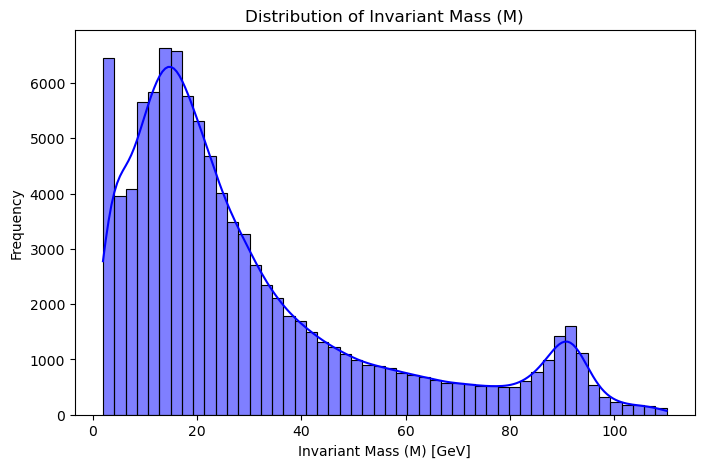

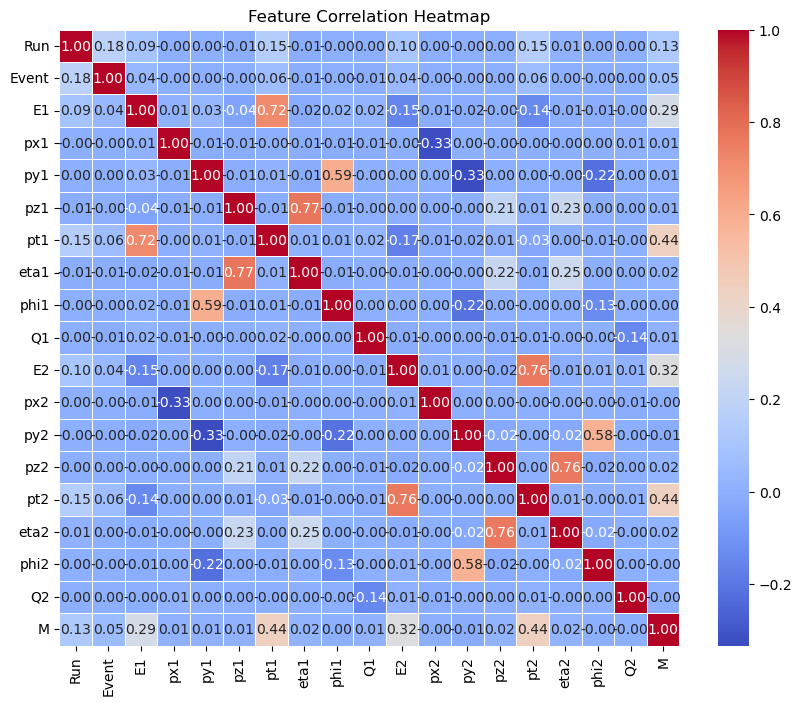

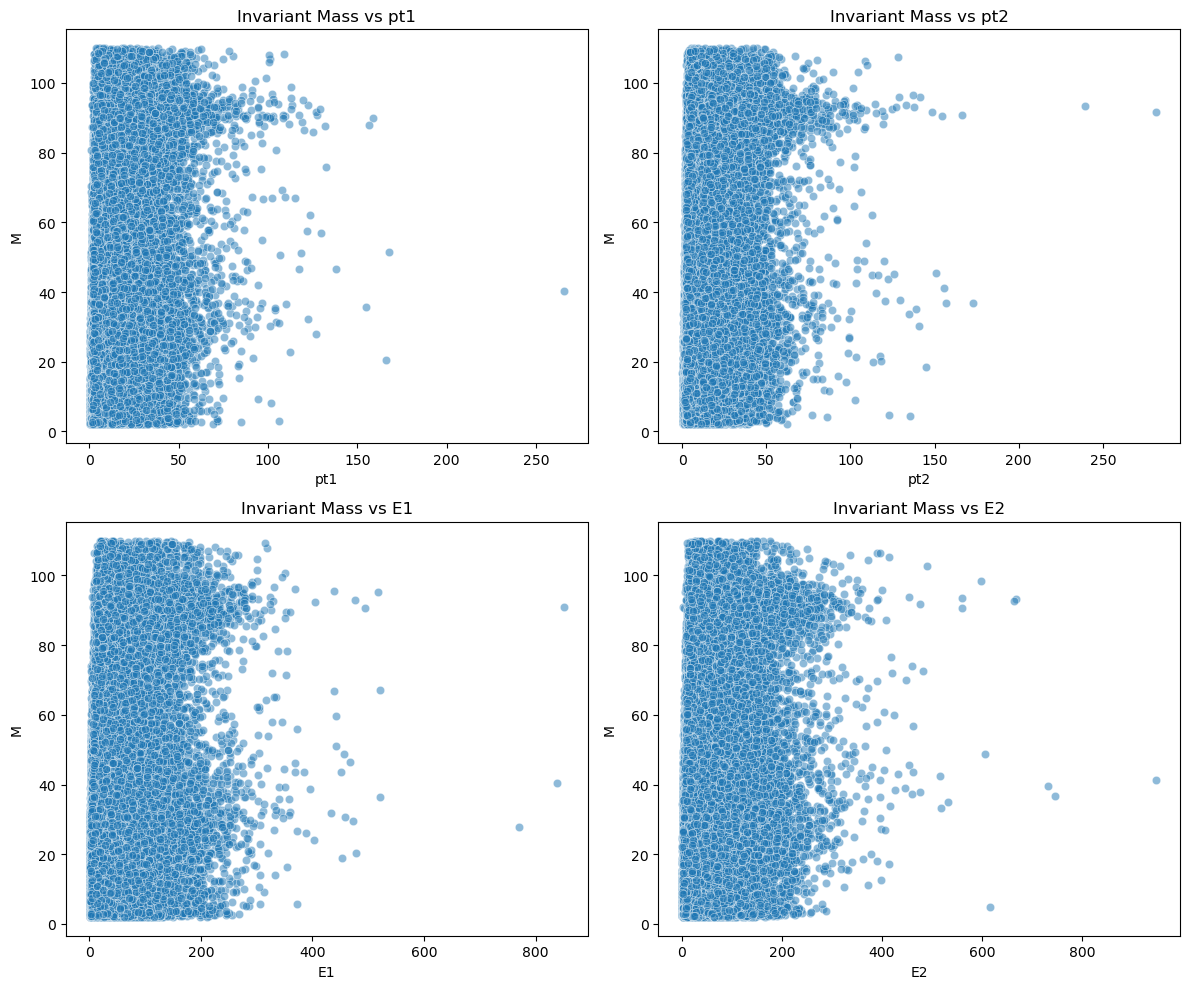

In [3]:
# Data Visualization
plt.figure(figsize=(8, 5))
sns.histplot(df['M'], bins=50, kde=True, color='blue')
plt.xlabel("Invariant Mass (M) [GeV]")
plt.ylabel("Frequency")
plt.title("Distribution of Invariant Mass (M)")
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

# Scatter Plots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
sns.scatterplot(x=df['pt1'], y=df['M'], alpha=0.5, ax=axes[0, 0])
axes[0, 0].set_title("Invariant Mass vs pt1")
sns.scatterplot(x=df['pt2'], y=df['M'], alpha=0.5, ax=axes[0, 1])
axes[0, 1].set_title("Invariant Mass vs pt2")
sns.scatterplot(x=df['E1'], y=df['M'], alpha=0.5, ax=axes[1, 0])
axes[1, 0].set_title("Invariant Mass vs E1")
sns.scatterplot(x=df['E2'], y=df['M'], alpha=0.5, ax=axes[1, 1])
axes[1, 1].set_title("Invariant Mass vs E2")
plt.tight_layout()
plt.show()

In [11]:
# Feature Selection using Feature Importance (XGBoost)
X = df.drop("M", axis=1)
y = df["M"]

model = XGBRegressor()
model.fit(X, y)

feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False).plot(kind="bar", figsize=(10, 5))
plt.title("Feature Importance")
plt.show()

XGBoostError: [16:25:22] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\data\data.cc:514: Check failed: valid: Label contains NaN, infinity or a value too large.

CatBoost - RMSE: 31.2563, R2: -0.0013
XGBoost - RMSE: 31.3612, R2: -0.0080
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012093 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3831
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 17
[LightGBM] [Info] Start training from score 55.917511
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
LightGBM - RMSE: 31.3133, R2: -0.0049
RandomForest - RMSE: 31.2478, R2: -0.0007
GradientBoosting - RMSE: 31.3214, R2: -0.0055
Best m

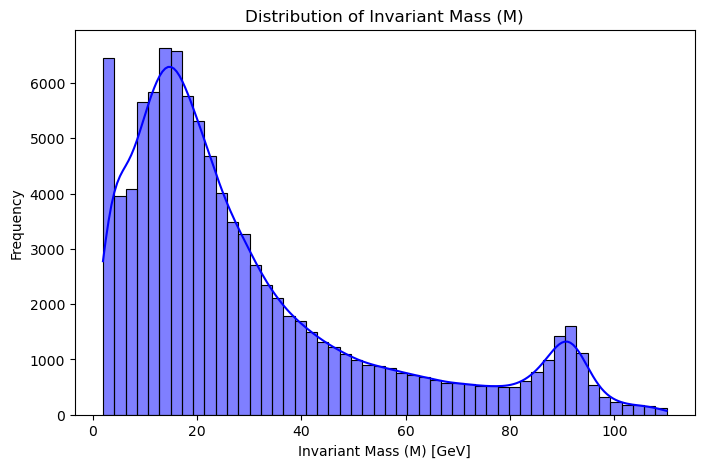

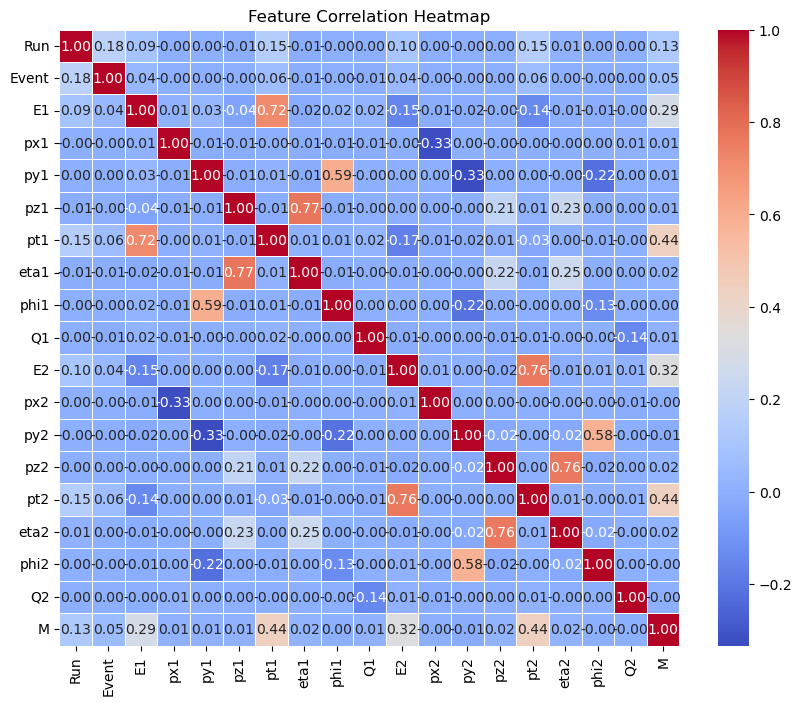

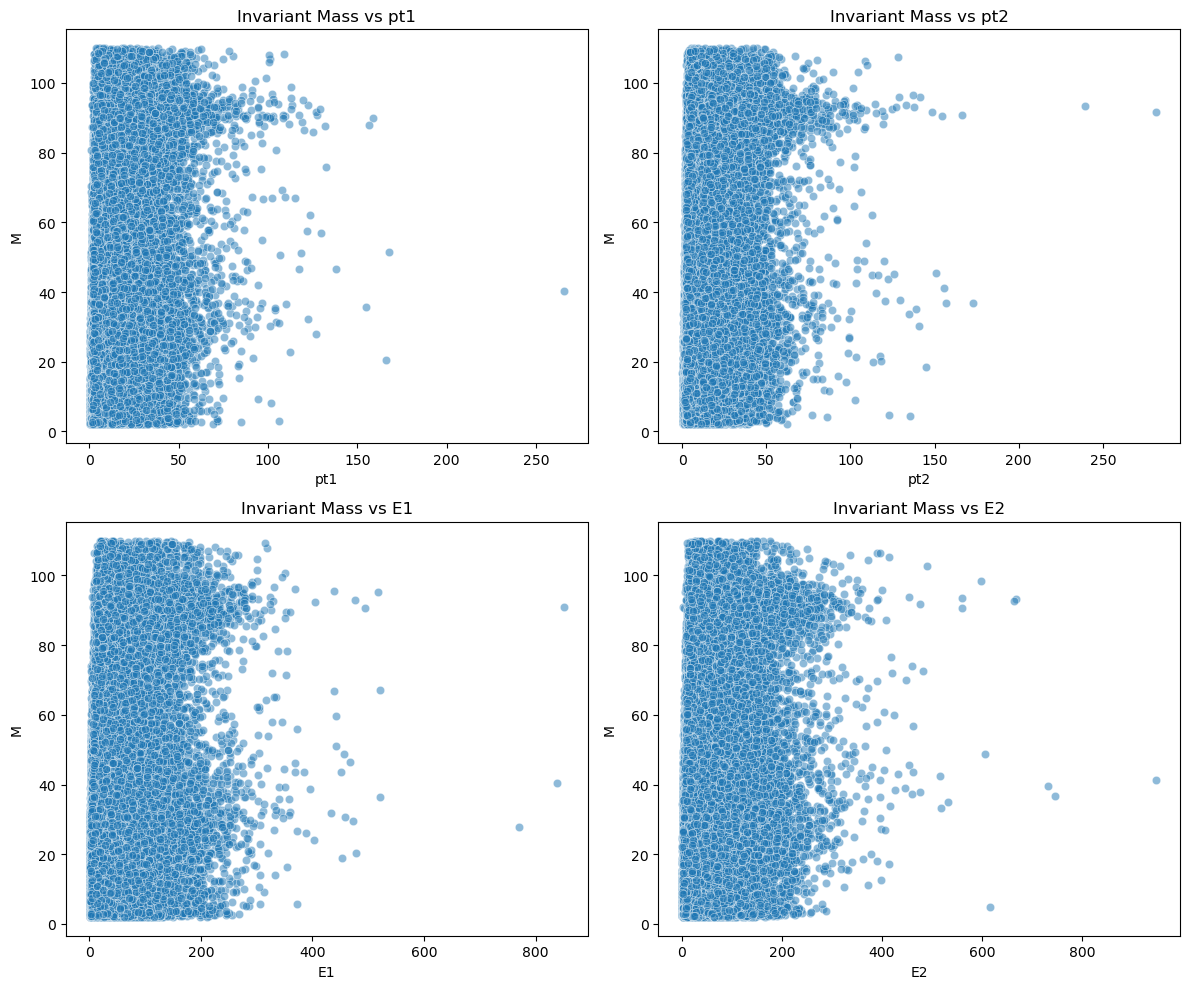

XGBoostError: [16:41:25] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\data\data.cc:514: Check failed: valid: Label contains NaN, infinity or a value too large.

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Load dataset
df = pd.read_csv("D:/Dummy/dielectron.csv")  # Update path accordingly

# Generate synthetic data
n_rows, n_cols = df.shape
cols = df.columns
synthetic_df = pd.DataFrame(columns=cols)

for col in cols:
    if pd.api.types.is_integer_dtype(df[col]):
        synthetic_df[col] = np.random.randint(df[col].min(), df[col].max(), size=n_rows)
    elif pd.api.types.is_float_dtype(df[col]):
        synthetic_df[col] = np.random.uniform(df[col].min(), df[col].max(), size=n_rows)
    else:
        synthetic_df[col] = np.random.uniform(0, 1, size=n_rows)

if 'Event' in synthetic_df.columns:
    synthetic_df['Event'] = synthetic_df['Event'].astype(int)

synthetic_df.to_csv("synthetic_dielectron.csv", index=False)

# Define features and target
X = synthetic_df.drop(['Event', 'M'], axis=1)
y = synthetic_df['M']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define models
models = {
    "CatBoost": CatBoostRegressor(iterations=200, learning_rate=0.05, depth=6, random_seed=42, verbose=0),
    "XGBoost": XGBRegressor(n_estimators=200, learning_rate=0.05, max_depth=6, random_state=42),
    "LightGBM": LGBMRegressor(n_estimators=200, learning_rate=0.05, max_depth=6, random_state=42),
    "RandomForest": RandomForestRegressor(n_estimators=200, max_depth=6, random_state=42),
    "GradientBoosting": GradientBoostingRegressor(n_estimators=200, learning_rate=0.05, max_depth=6, random_state=42)
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    results[name] = {"RMSE": rmse, "R2": r2}
    print(f"{name} - RMSE: {rmse:.4f}, R2: {r2:.4f}")

# Find best model
best_model = min(results, key=lambda x: results[x]['RMSE'])
print(f"Best model: {best_model} with RMSE: {results[best_model]['RMSE']:.4f} and R2: {results[best_model]['R2']:.4f}")

# Data Visualization
plt.figure(figsize=(8, 5))
sns.histplot(df['M'], bins=50, kde=True, color='blue')
plt.xlabel("Invariant Mass (M) [GeV]")
plt.ylabel("Frequency")
plt.title("Distribution of Invariant Mass (M)")
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

# Scatter Plots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
sns.scatterplot(x=df['pt1'], y=df['M'], alpha=0.5, ax=axes[0, 0])
axes[0, 0].set_title("Invariant Mass vs pt1")
sns.scatterplot(x=df['pt2'], y=df['M'], alpha=0.5, ax=axes[0, 1])
axes[0, 1].set_title("Invariant Mass vs pt2")
sns.scatterplot(x=df['E1'], y=df['M'], alpha=0.5, ax=axes[1, 0])
axes[1, 0].set_title("Invariant Mass vs E1")
sns.scatterplot(x=df['E2'], y=df['M'], alpha=0.5, ax=axes[1, 1])
axes[1, 1].set_title("Invariant Mass vs E2")
plt.tight_layout()
plt.show()

# Feature Selection using Feature Importance (XGBoost)
X = df.drop("M", axis=1)
y = df["M"]

model = XGBRegressor()
model.fit(X, y)

feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False).plot(kind="bar", figsize=(10, 5))
plt.title("Feature Importance")
plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Run     100000 non-null  int64  
 1   Event   100000 non-null  int64  
 2   E1      100000 non-null  float64
 3   px1     100000 non-null  float64
 4   py1     100000 non-null  float64
 5   pz1     100000 non-null  float64
 6   pt1     100000 non-null  float64
 7   eta1    100000 non-null  float64
 8   phi1    100000 non-null  float64
 9   Q1      100000 non-null  int64  
 10  E2      100000 non-null  float64
 11  px2     100000 non-null  float64
 12  py2     100000 non-null  float64
 13  pz2     100000 non-null  float64
 14  pt2     100000 non-null  float64
 15  eta2    100000 non-null  float64
 16  phi2    100000 non-null  float64
 17  Q2      100000 non-null  int64  
 18  M       100000 non-null  float64
dtypes: float64(15), int64(4)
memory usage: 14.5 MB
None
                 Run         Event 

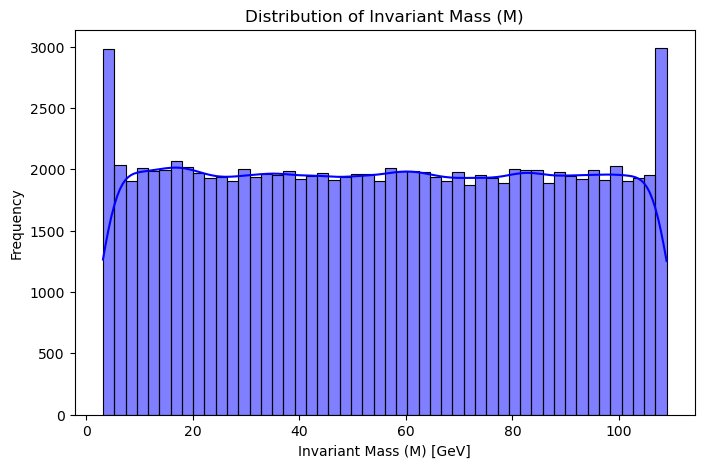

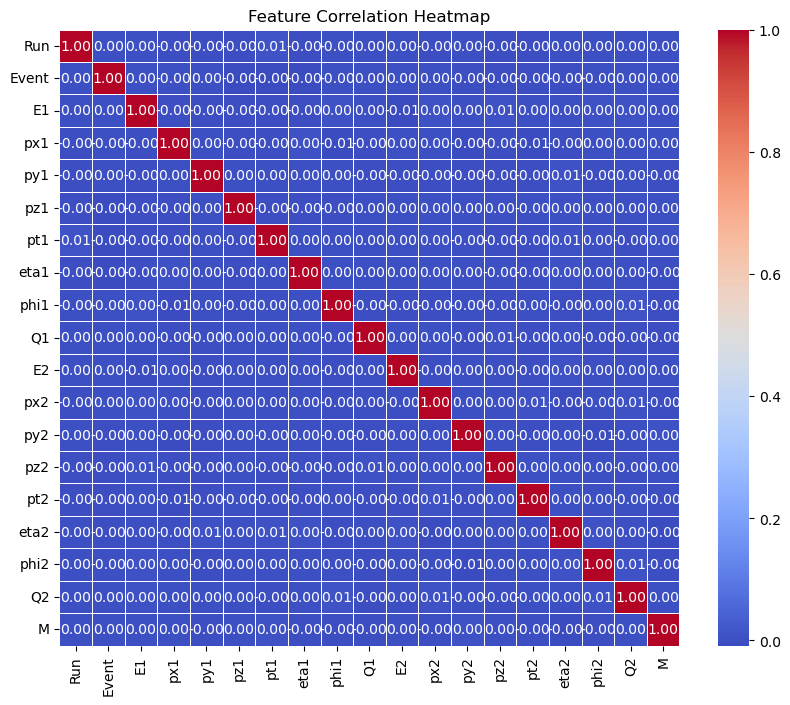

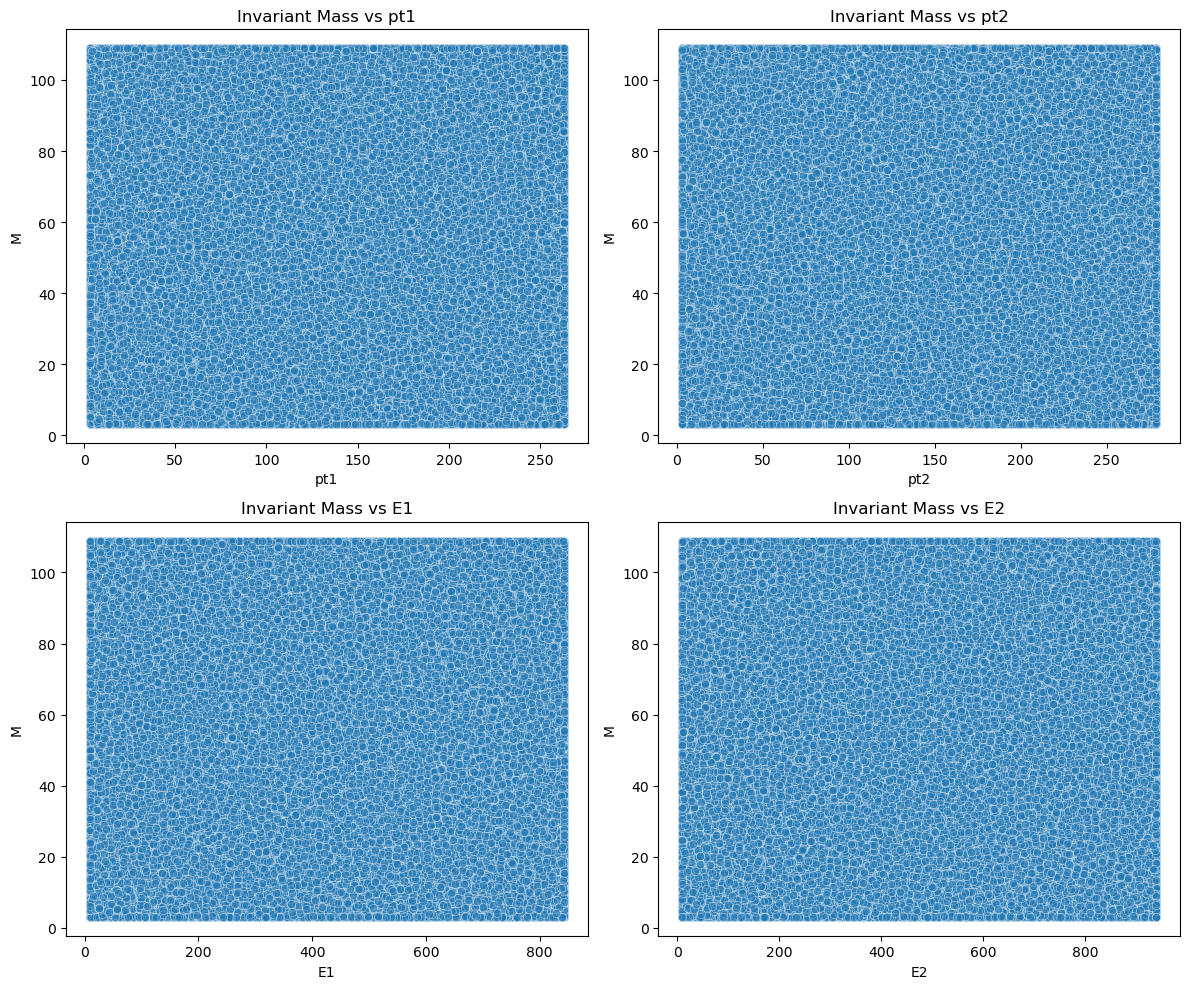

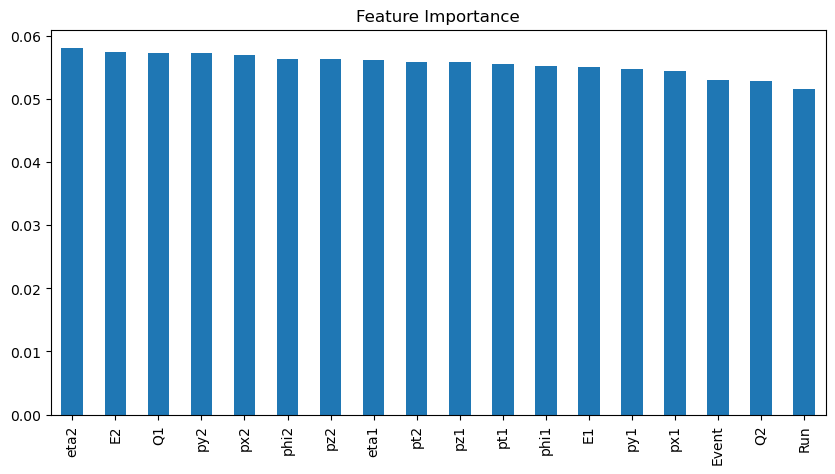

RandomForest - RMSE: 31.4695, R²: -0.0163
GradientBoosting - RMSE: 31.2384, R²: -0.0014
XGBoost - RMSE: 31.8995, R²: -0.0442
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001396 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2807
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 12
[LightGBM] [Info] Start training from score 55.917922
LightGBM - RMSE: 31.2962, R²: -0.0051
CatBoost - RMSE: 31.4596, R²: -0.0156
Best Parameters: {'learning_rate': 0.01, 'iterations': 500, 'depth': 4}
Final Tuned Model - RMSE: 31.2234, R²: -0.0004


In [18]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats.mstats import winsorize
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

# Load Data
df = pd.read_csv("synthetic_dielectron.csv")

# Data Overview
print(df.info())
print(df.describe())
print(df.isnull().sum())  # Check missing values

# Handle Missing Values (Fill with median)
df.fillna(df.median(), inplace=True)

# Winsorization (Capping extreme outliers)
for col in df.columns:
    df[col] = winsorize(df[col], limits=[0.01, 0.01])

# Data Visualization
plt.figure(figsize=(8, 5))
sns.histplot(df['M'], bins=50, kde=True, color='blue')
plt.xlabel("Invariant Mass (M) [GeV]")
plt.ylabel("Frequency")
plt.title("Distribution of Invariant Mass (M)")
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

# Scatter Plots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
sns.scatterplot(x=df['pt1'], y=df['M'], alpha=0.5, ax=axes[0, 0])
axes[0, 0].set_title("Invariant Mass vs pt1")
sns.scatterplot(x=df['pt2'], y=df['M'], alpha=0.5, ax=axes[0, 1])
axes[0, 1].set_title("Invariant Mass vs pt2")
sns.scatterplot(x=df['E1'], y=df['M'], alpha=0.5, ax=axes[1, 0])
axes[1, 0].set_title("Invariant Mass vs E1")
sns.scatterplot(x=df['E2'], y=df['M'], alpha=0.5, ax=axes[1, 1])
axes[1, 1].set_title("Invariant Mass vs E2")
plt.tight_layout()
plt.show()

# Feature Selection using Feature Importance (XGBoost)
X = df.drop("M", axis=1)
y = df["M"]

model = XGBRegressor()
model.fit(X, y)

feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False).plot(kind="bar", figsize=(10, 5))
plt.title("Feature Importance")
plt.show()

# Remove least important features (Example: Keep top 8)
top_features = feature_importances.nlargest(12).index
X = X[top_features]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling (Only for Linear Models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Models Dictionary
models = {
    "RandomForest": RandomForestRegressor(random_state=42),
    "GradientBoosting": GradientBoostingRegressor(),
    "XGBoost": XGBRegressor(),
    "LightGBM": LGBMRegressor(),
    "CatBoost": CatBoostRegressor(verbose=False)
}

# Train and Evaluate Models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    results[name] = (rmse, r2)
    print(f"{name} - RMSE: {rmse:.4f}, R²: {r2:.4f}")

# Select Best Model (Assuming CatBoost performs best)
best_model = CatBoostRegressor(verbose=False)

# Hyperparameter Tuning with RandomizedSearchCV
param_dist = {
    "depth": [4, 6, 8, 10],
    "learning_rate": [0.01, 0.05, 0.1, 0.3, 0.5],
    "iterations": [500, 1000, 1500]
}

random_search = RandomizedSearchCV(
    best_model, param_distributions=param_dist,
    n_iter=10, cv=5, scoring="r2", random_state=42
)

random_search.fit(X_train, y_train)
print("Best Parameters:", random_search.best_params_)

# Train Final Model with Best Parameters
final_model = CatBoostRegressor(
    depth=random_search.best_params_["depth"],
    learning_rate=random_search.best_params_["learning_rate"],
    iterations=random_search.best_params_["iterations"],
    verbose=False
)

final_model.fit(X_train, y_train)
y_pred_final = final_model.predict(X_test)

# Final Model Evaluation
final_rmse = np.sqrt(mean_squared_error(y_test, y_pred_final))
final_r2 = r2_score(y_test, y_pred_final)
print(f"Final Tuned Model - RMSE: {final_rmse:.4f}, R²: {final_r2:.4f}")